In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def list_files(directory):
    import os
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

neuro_files = [f for f in list_files("pers_results/") if "neuroticism" in f.lower()]
base_files = [f for f in list_files("pers_results/") if "__" in f.lower()]

neuro_ = []
for neuro_file in neuro_files:
    neuro_df = pd.read_json("pers_results/" + neuro_file)
    neuro_.append(neuro_df)
neuro_df = pd.concat(neuro_)

base_ = []
for base_file in base_files:
    base_df = pd.read_json("pers_results/" + base_file)
    base_.append(base_df)
base_df = pd.concat(base_)

neuro_lvl = neuro_df['Neuroticism'].apply(lambda x: x.split("+-")[0]).astype(float)
base_lvl = base_df['Neuroticism'].apply(lambda x: x.split("+-")[0]).astype(float)

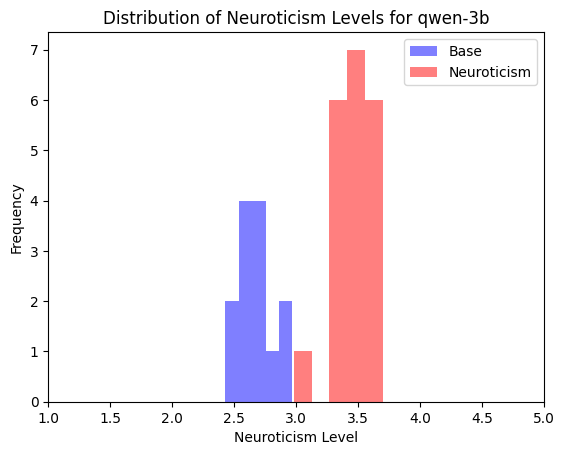

In [27]:
plt.hist(base_lvl, bins=5, alpha=0.5, label='Base', color='blue')
plt.hist(neuro_lvl, bins=5, alpha=0.5, label='Neuroticism', color='red')
plt.xlim(1, 5)
plt.xlabel('Neuroticism Level')
plt.ylabel('Frequency')
plt.title('Distribution of Neuroticism Levels for qwen-3b')
plt.legend()
plt.show()